# **Customer Segmentation Analysis**

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**Load dataset**

In [ ]:
df = pd.read_csv('/content/ifood_df.csv')

1.**Data Exploration**

In [ ]:
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  Accepte

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds      

In [ ]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.1304

2.**Data Cleaning**

In [ ]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)


In [ ]:
# Handle missing values
missing_threshold = 0.3  # Drop columns with more than 30% missing values
df = df.dropna(thresh=int(missing_threshold * len(df)), axis=1)


In [ ]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)


In [ ]:
# Remove outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print("\nAfter Removing Outliers:")
print(df.head())


After Removing Outliers:
     Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
3   26646.0        1         0       26        11          4               20   
15  41850.0        1         1       51        53          5               19   
40  21994.0        0         1        4         9          0                6   
44  41728.0        1         0       92        13          6               15   
61  32474.0        1         1        0        10          0                1   

    MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
3                10                 3             5  ...                 1   
15                2                13             4  ...                 0   
40                3                 1             3  ...                 1   
44                3                 5            13  ...                 1   
61                0                 0             0  ...                 1   

    marital_Widow 

3.**Feature Selection and Scaling**

In [ ]:
# Step 3: Feature Selection and Scaling

# Print available columns after cleaning
print("\nAvailable columns after cleaning:", df.columns.tolist())

df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

potential_features = ['income', 'recency', 'mnttotal', 'numwebpurchases',
                      'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'age']

features = [col for col in potential_features if col in df.columns]

if len(features) < 2:
    raise ValueError("Not enough numerical features available for clustering. Please check the dataset.")

print("\nUsing features for clustering:", features)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])




Available columns after cleaning: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']

Using features for clustering: ['income', 'recency', 'mnttotal', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'age']


4.**Determine Optimal Clusters**

Text(0.5, 1.0, 'Elbow Method')

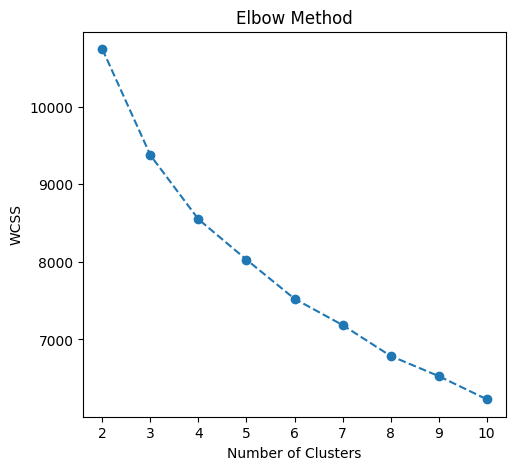

In [ ]:
wcss = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

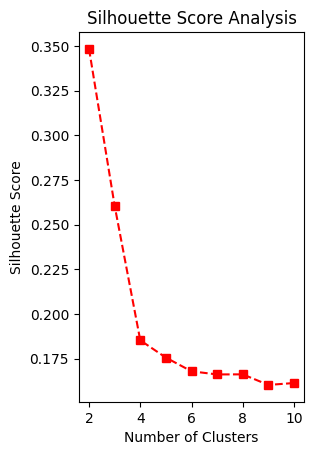

In [ ]:
# Silhouette Score Analysis
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()


5.**Applying K-Means**

Shape of df_scaled: (2205, 8)


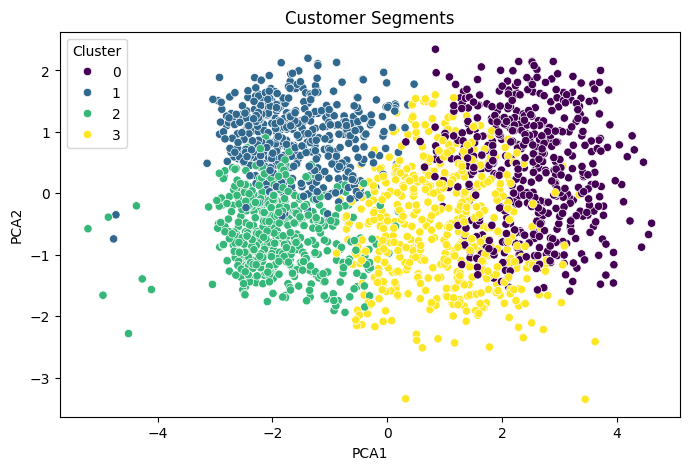

In [ ]:
# Check the shape of df_scaled
print(f"Shape of df_scaled: {df_scaled.shape}")

n_components = min(2, df_scaled.shape[1])
pca = PCA(n_components=n_components)

if n_components > 1:
    df[['PCA1', 'PCA2']] = pca.fit_transform(df_scaled)

    optimal_k = 4

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df_scaled)
   # Scatter plot for clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()



6.**PCA for Visualization**





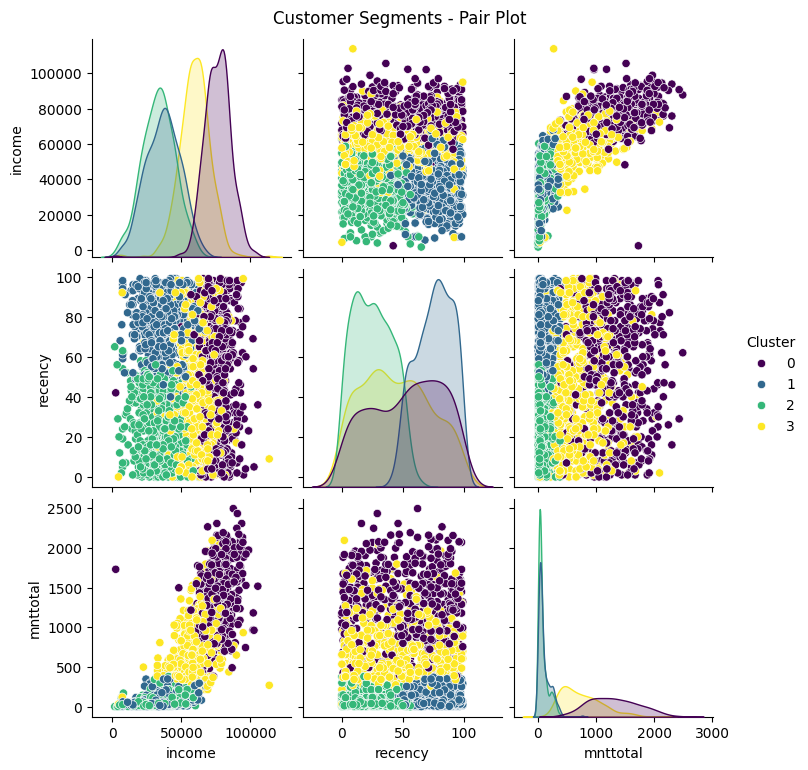

In [ ]:
features_for_pairplot = ['income', 'recency', 'mnttotal']  # Add more features as needed

# Create the pair plot
sns.pairplot(df, vars=features_for_pairplot, hue='Cluster', palette='viridis')
plt.suptitle('Customer Segments - Pair Plot', y=1.02)  # Add a title
plt.show()

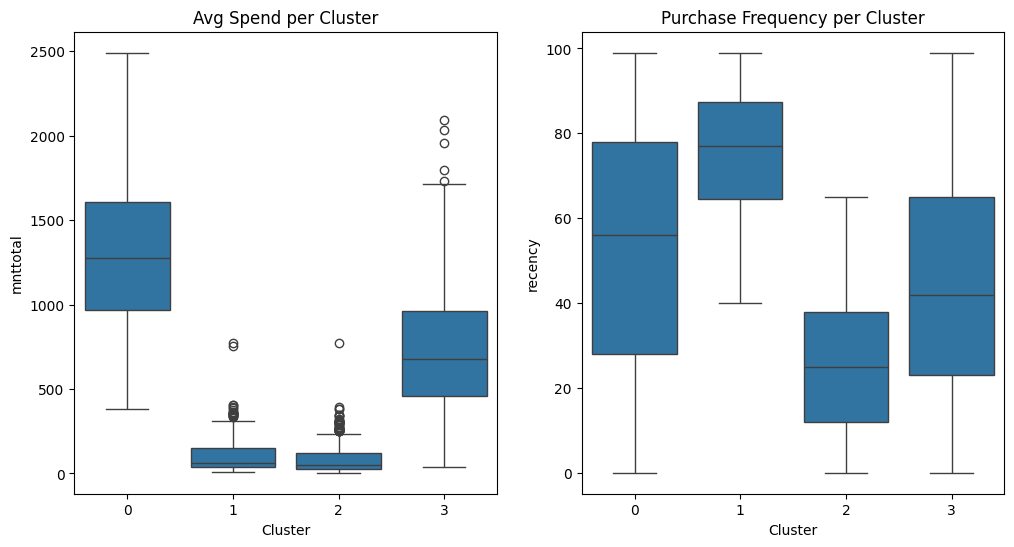

<ipython-input-24-cda817efd420>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


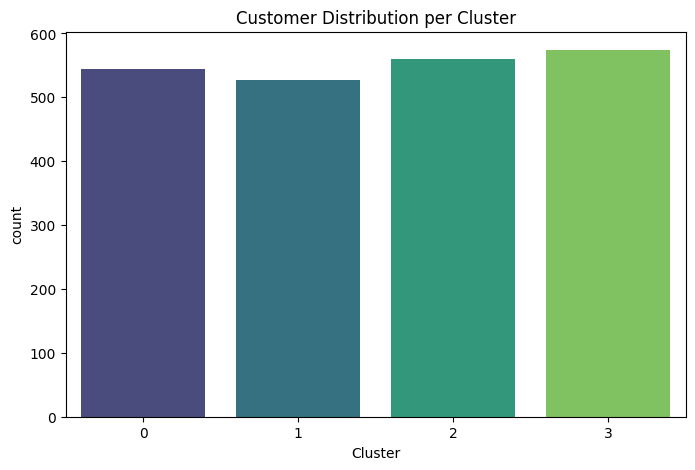

In [ ]:
# Additional Visualizations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# Assuming 'mnttotal' represents average spending, replace 'Avg_Spend' with 'mnttotal'
sns.boxplot(x='Cluster', y='mnttotal', data=df)
plt.title('Avg Spend per Cluster')

plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='recency', data=df)
plt.title('Purchase Frequency per Cluster')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Customer Distribution per Cluster')
plt.show()

7.**Cluster Insights**

In [ ]:

print("Cluster Summary:")
print(df.groupby('Cluster').mean())

Cluster Summary:
               income   kidhome  teenhome    recency    mntwines  mntfruits  \
Cluster                                                                       
0        76240.295956  0.033088  0.238971  52.650735  634.139706  62.277574   
1        36771.920304  0.745731  0.535104  75.455408   56.381404   6.235294   
2        33426.089286  0.776786  0.430357  25.282143   44.946429   4.887500   
3        59676.979094  0.224739  0.808362  44.425087  479.508711  31.911150   

         mntmeatproducts  mntfishproducts  mntsweetproducts  mntgoldprods  \
Cluster                                                                     
0             447.705882        92.268382         65.172794     74.900735   
1              29.161290         8.796964          6.592030     19.457306   
2              22.500000         7.869643          4.603571     16.703571   
3             162.008711        41.839721         31.902439     64.097561   

         ...  education_2n_cycle  education_b

In [ ]:
# Step 8: Business Recommendations
for cluster in df['Cluster'].unique():
    segment = df[df['Cluster'] == cluster]
    avg_spend = segment['mnttotal'].mean()
    print(f"Cluster {cluster} Recommendations:")
    if avg_spend > 500:
        print("- Target high-value customers with exclusive offers.")
    else:
        print("- Provide discounts to encourage more spending.")
    print()

Cluster 3 Recommendations:
- Target high-value customers with exclusive offers.

Cluster 2 Recommendations:
- Provide discounts to encourage more spending.

Cluster 1 Recommendations:
- Provide discounts to encourage more spending.

Cluster 0 Recommendations:
- Target high-value customers with exclusive offers.



**Final Observations**

1. Distinct Customer Segments Identified

* Using K-Means clustering, we identified 4 customer segments based on their purchase behavior.
* PCA visualization clearly shows distinct customer clusters.

2. Spending Behavior Differences

* Some clusters have high spenders with a strong purchasing frequency, while others represent low spenders with occasional purchases.

3. Customer Engagement Varies

* Certain segments show frequent website visits and purchases, while others have low engagement and sporadic transactions.
* A segment with high recency values indicates customers who haven’t purchased recently.

4. Age and Tenure Impact

* Older customers with longer tenure tend to have a higher lifetime purchase value.
* Younger customers are more price-sensitive and may require targeted incentives.


**Business Recommendations**

1. High-Value Customers (Loyal & Frequent Buyers)

* Offer loyalty programs, premium membership benefits, and exclusive discounts to retain them.
* Personalize email marketing campaigns with high-value product recommendations.

2. Occasional Buyers (Medium Spend & Engagement)

* Provide discounts and seasonal promotions to encourage repeat purchases.
* Implement a subscription model or bundle deals to increase purchase frequency.

3. Low-Spending Customers (Price-Sensitive Buyers)

* Introduce affordable pricing tiers or limited-time offers.
* Use targeted digital ads to increase brand recall and engagement.

4. Inactive Customers (High Recency, Low Purchases)

* Send reactivation emails with special offers to bring them back.
* Use personalized recommendations based on past purchase behavior.
